**Import libraries**

In [46]:
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1,2 Downloading and Loading the dataset**

In [47]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**3.Performing visualization**

**Univariate Analysis**

Univariate Scatter Plot

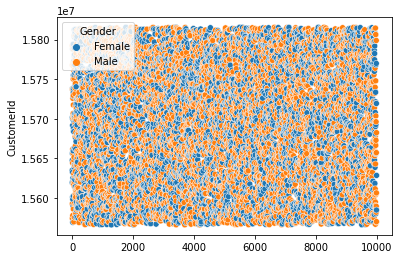

In [48]:
sns.scatterplot(x=data.index,y=data['CustomerId'],hue=data['Gender'])

Line plot

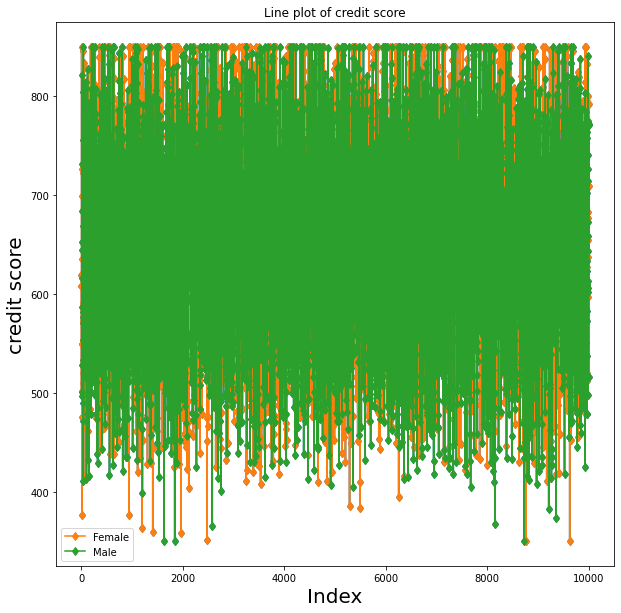

In [49]:
plt.figure(figsize=(10,10))
plt.title("Line plot of credit score")
plt.xlabel('Index',fontsize=20)
plt.ylabel('credit score',fontsize=20)
plt.plot(data.index,data['CreditScore'],markevery=1,marker='d')
for name,group in data.groupby('Gender'):
  plt.plot(group.index,group['CreditScore'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()


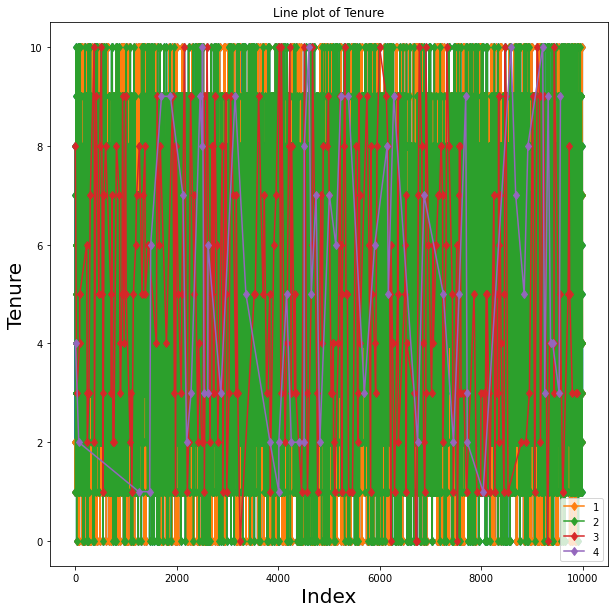

In [14]:
plt.figure(figsize=(10,10))
plt.title("Line plot of Tenure")
plt.xlabel('Index',fontsize=20)
plt.ylabel('Tenure',fontsize=20)
plt.plot(data.index,data['Tenure'],markevery=1,marker='d')
for name,group in data.groupby('NumOfProducts'):
  plt.plot(group.index,group['Tenure'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

**Bi-variate analysis**

Scatterplots

Text(0, 0.5, 'Gender')

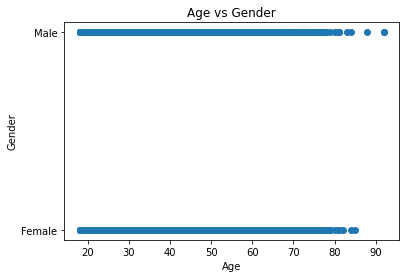

In [50]:
plt.scatter(data.Age, data.Gender)
plt.title('Age vs Gender')
plt.xlabel('Age')
plt.ylabel('Gender')

Text(0, 0.5, 'CreditScore')

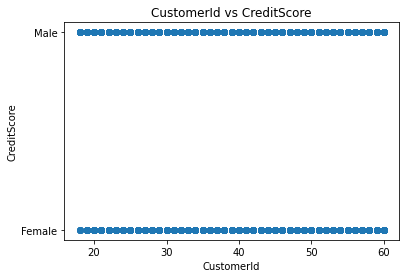

In [106]:
plt.scatter(data.Age, data.Gender)
plt.title('CustomerId vs CreditScore')
plt.xlabel('CustomerId')
plt.ylabel('CreditScore')

Barplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


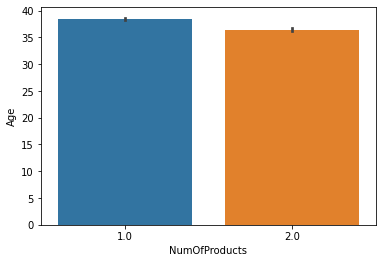

In [107]:
sns.barplot(data["NumOfProducts"],data["Age"])

**Multi variate Analysis**

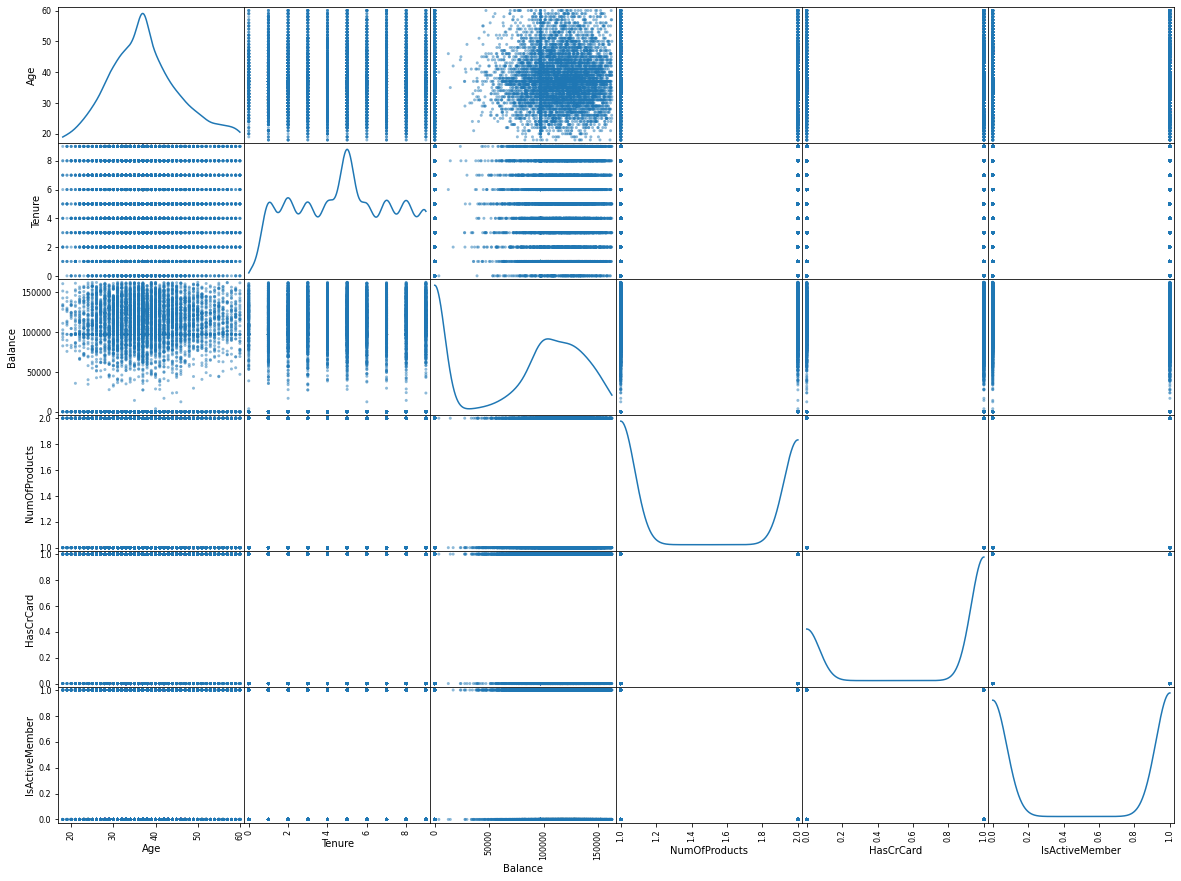

In [105]:
pd.plotting.scatter_matrix(data.loc[:, "Age":"IsActiveMember"], diagonal="kde",figsize=(20,15))
plt.show()

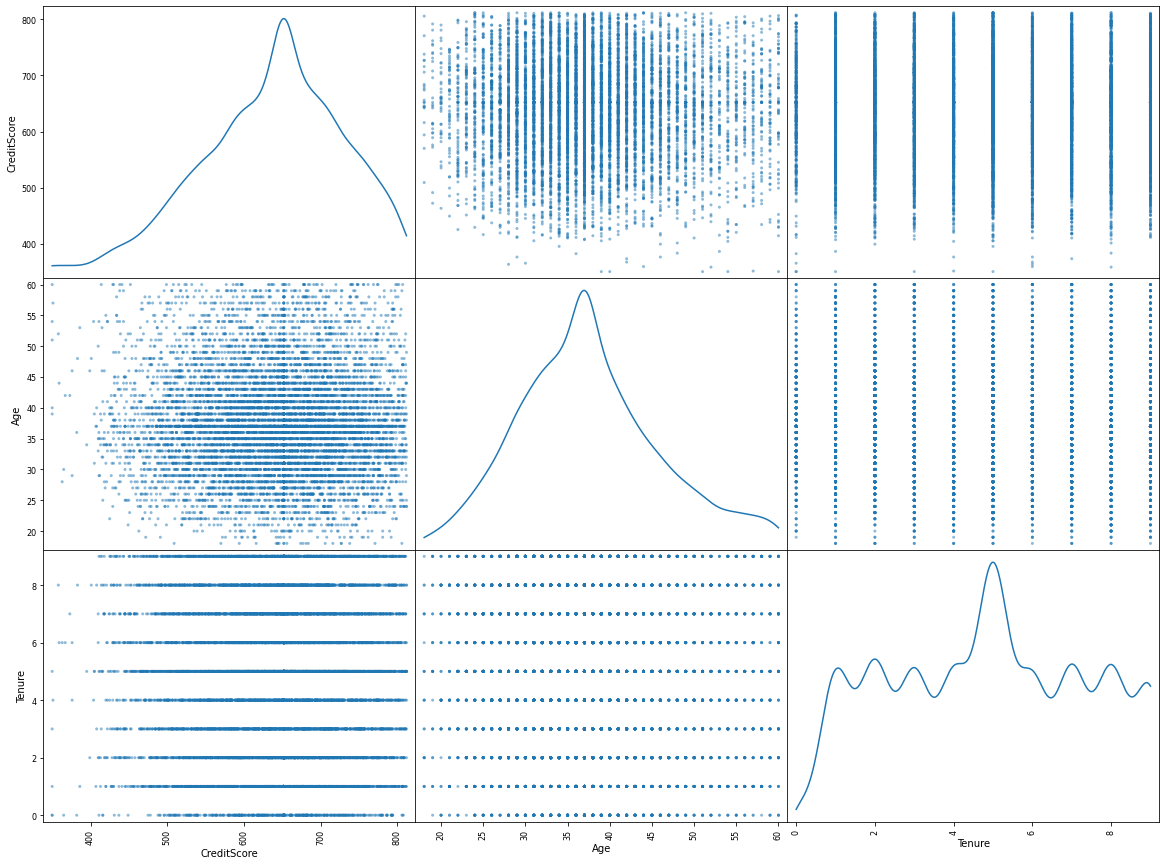

In [104]:
pd.plotting.scatter_matrix(data.loc[:, "CreditScore":"Tenure"], diagonal="kde",figsize=(20,15))
plt.show()

**4.Descriptive statistics**

In [52]:
data.shape

(10000, 14)

In [53]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [54]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**5.Handling missing values**

In [56]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**6.1.Identifying Outliers with Interquartile Range (IQR)**

In [57]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

RowNumber            4999.5000
CustomerId         124705.5000
CreditScore           134.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64


In [58]:
print((data > (Q3 + 1.5 * IQR))|(data < (Q1 - 1.5 * IQR)))



        Age  Balance  CreditScore  CustomerId  EstimatedSalary  Exited  \
0     False    False        False       False            False    True   
1     False    False        False       False            False   False   
2     False    False        False       False            False    True   
3     False    False        False       False            False   False   
4     False    False        False       False            False   False   
...     ...      ...          ...         ...              ...     ...   
9995  False    False        False       False            False   False   
9996  False    False        False       False            False   False   
9997  False    False        False       False            False    True   
9998  False    False        False       False            False    True   
9999  False    False        False       False            False   False   

      Gender  Geography  HasCrCard  IsActiveMember  NumOfProducts  RowNumber  \
0      False      False      Fa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


**6.2.Replacing Outliers with Median Values**

In [59]:
a=data['Age'].quantile(0.50) 
b=data['Age'].quantile(0.95)
c=data['Balance'].quantile(0.50) 
d=data['Balance'].quantile(0.95)
e=data['CreditScore'].quantile(0.50)
f=data['CreditScore'].quantile(0.95) 
print(data['Age'])

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64


In [60]:
data['Age'] = np.where(data['Age'] > b, a, data['Age'])
data['Balance'] = np.where(data['Balance'] > d, c, data['Balance'])
data['CreditScore'] = np.where(data['CreditScore'] > f, e, data['CreditScore'])



In [61]:
a=data['CustomerId'].quantile(0.50) 
b=data['CustomerId'].quantile(0.95)
c=data['EstimatedSalary'].quantile(0.50) 
d=data['EstimatedSalary'].quantile(0.95)
e=data['Exited'].quantile(0.50)
f=data['Exited'].quantile(0.95) 

In [62]:
data['CustomerId'] = np.where(data['CustomerId'] > b, a, data['CustomerId'])
data['EstimatedSalary'] = np.where(data['EstimatedSalary'] > d, c, data['EstimatedSalary'])
data['Exited'] = np.where(data['Exited'] > f, e, data['Exited'])



In [63]:
a=data['IsActiveMember'].quantile(0.50) 
b=data['IsActiveMember'].quantile(0.95)
c=data['NumOfProducts'].quantile(0.50) 
d=data['NumOfProducts'].quantile(0.95)
e=data['HasCrCard'].quantile(0.50)
f=data['HasCrCard'].quantile(0.95) 

In [64]:
data['IsActiveMember'] = np.where(data['IsActiveMember'] > b, a, data['IsActiveMember'])
data['NumOfProducts'] = np.where(data['NumOfProducts'] >d, c, data['NumOfProducts'])
data['HasCrCard'] = np.where(data['HasCrCard'] > f, e, data['HasCrCard'])



In [65]:
e=data['Tenure'].quantile(0.50)
f=data['Tenure'].quantile(0.95) 

In [66]:
data['Tenure'] = np.where(data['Tenure'] > f, e, data['Tenure'])

data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.568500e+07,641.183700,37.506100,4.767800,72484.737287,1.459000,0.70550,0.515100,95341.085092,0.203700
std,2886.89568,6.660670e+04,86.421079,8.292011,2.661915,58166.393545,0.498341,0.45584,0.499797,53220.039928,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97193.580000,1.000000,1.00000,1.000000,100190.672500,0.000000
75%,7500.25000,1.574046e+07,704.000000,42.000000,7.000000,122029.750000,2.000000,1.00000,1.000000,139432.030000,0.000000
max,10000.00000,1.580303e+07,812.000000,60.000000,9.000000,162702.350000,2.000000,1.00000,1.000000,190155.130000,1.000000


**7.Check for Categorical columns and perform encoding**

In [67]:
!pip install  category_encoders 



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [109]:
import category_encoders as ce
encoder = ce.PolynomialEncoder(cols=["Tenure"])
encoder.fit_transform(data, verbose=1).iloc[:,6:14].head()

,Gender,Age,Tenure_0,Tenure_1,Tenure_2,Tenure_3,Tenure_4,Tenure_5
0,Female,42.0,-0.495434,0.522233,-0.453425,0.336581,-0.214834,0.116775
1,Female,41.0,-0.385337,0.174078,0.151142,-0.411377,0.501280,-0.428174
2,Female,42.0,-0.275241,-0.087039,0.377854,-0.317882,-0.035806,0.389249
3,Female,39.0,-0.385337,0.174078,0.151142,-0.411377,0.501280,-0.428174
4,Female,43.0,-0.495434,0.522233,-0.453425,0.336581,-0.214834,0.116775


In [94]:
encoder = ce.PolynomialEncoder(cols=["Age"])
encoder.fit_transform(data, verbose=1).iloc[:,6:14].head()

,Gender,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6
0,Female,-0.258062,0.318006,-0.350873,0.362414,-0.356494,3.367673e-01,-0.306952
1,Female,-0.245774,0.272576,-0.250624,0.189836,-0.101855,4.255706e-16,0.102317
2,Female,-0.258062,0.318006,-0.350873,0.362414,-0.356494,3.367673e-01,-0.306952
3,Female,-0.233485,0.229363,-0.162600,0.055141,0.065833,-1.724906e-01,0.242068
4,Female,-0.221196,0.188366,-0.086190,-0.046091,0.163962,-2.299874e-01,0.224599


In [95]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,2,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,3,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,1.0,1.0,0.0,113931.57,1.0
3,4,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0
4,5,15737888.0,Mitchell,652.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


**8.Splitting the dependent and independent columns**

In [96]:
X=data.iloc[:,0:6].values
X.shape

(10000, 6)

In [97]:
y=data.iloc[:,6:].values
y.shape

(10000, 8)

**9.Scale the independent variables**


In [98]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
new_x= min_max_scaler.fit_transform(y) 
print ("\n VALUES AFTER MIN MAX SCALING: \n\n", new_x) 
Standardisation = preprocessing.StandardScaler() 
new_x= Standardisation.fit_transform(y) 
print ("\n\n VALUES AFTER STANDARDIZATION : \n\n", new_x) 


 VALUES AFTER MIN MAX SCALING: 

 [[0.57142857 0.22222222 0.         ... 1.         0.53295155 1.        ]
 [0.54761905 0.11111111 0.51509926 ... 1.         0.59182128 0.        ]
 [0.57142857 0.88888889 0.98130605 ... 0.         0.59912624 1.        ]
 ...
 [0.42857143 0.77777778 0.         ... 1.         0.22127493 1.        ]
 [0.57142857 0.33333333 0.46142732 ... 0.         0.48845696 1.        ]
 [0.23809524 0.44444444 0.79988267 ... 0.         0.20079145 0.        ]]


 VALUES AFTER STANDARDIZATION : 

 [[ 0.54198251 -1.03982973 -1.24622411 ...  0.97024255  0.1128916
   1.97716468]
 [ 0.42137847 -1.4155179   0.19467751 ...  0.97024255  0.32323078
  -0.50577476]
 [ 0.54198251  1.21429931  1.49881085 ... -1.03067011  0.34933109
   1.97716468]
 ...
 [-0.18164175  0.83861114 -1.24622411 ...  0.97024255 -1.00071642
   1.97716468]
 [ 0.54198251 -0.66414155  0.0445395  ... -1.03067011 -0.04608579
   1.97716468]
 [-1.1464741  -0.28845338  0.99131014 ... -1.03067011 -1.07390304
  -0.5057

**10.Split the data into training and testing**

In [99]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [100]:
X_train.shape

(8000, 6)

In [101]:
X_test.shape

(2000, 6)

In [102]:
y_train=(y_train>0.5)
y_train

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True, False, ..., False,  True, False],
       ...,
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True, False],
       [ True,  True,  True, ..., False,  True,  True]])

In [92]:
y_test=(y_test>0.5)
y_test

array([[ True,  True,  True, ...,  True,  True, False],
       [ True,  True, False, ..., False,  True, False],
       [ True, False,  True, ..., False,  True,  True],
       ...,
       [ True, False,  True, ..., False,  True,  True],
       [ True,  True, False, ...,  True,  True, False],
       [ True,  True,  True, ...,  True,  True,  True]])